# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

#### Открываем файл

In [101]:
import pandas as pd
import sys
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Импортировали библиотеки.
Убрали научные натации.
Открыли файл.

#### Изучаем общую информацию и определяем пропуски

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Ознакомились с основной информацией о данных.

In [103]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000


Ознакомились с форматом данных таблицами.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

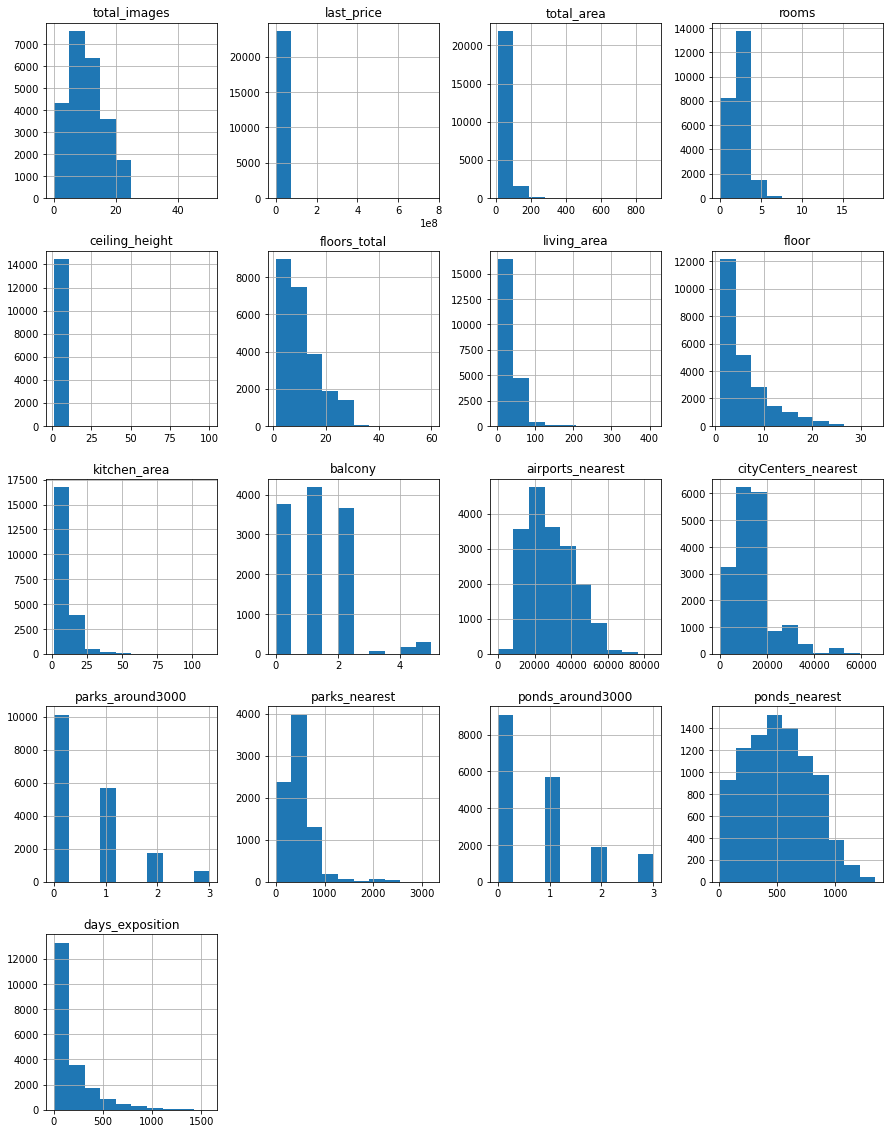

In [104]:
data.hist(figsize=(15, 20))


Ознакомились с гистограммами полученных данных.

### Предобработка данных

#### Описываем пропуски в данных

In [105]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

9195 - ceiling_height — высота потолков (м)
Люди могли просто не знать/замерить высоту потолков. Данные пропуски заполним медианным значением воизбежании влиение вбросов.

86 - floors_total — всего этажей в доме
Данный показатель является важным для принятия решений людей о покупке. Мы не можем заполнить эти значения данными, но их не много, мы их удалим.

1903 - living_area — жилая площадь в квадратных метрах (м²)
Этот показатель очень важен для исследования и пропуски имеют достатично большой объем от общей массы. Посчитаем примерную площадь по медианному значению стоимости одного квадратного метра.

20924 - is_apartment — апартаменты (булев тип)
Будем считать, что если данные не заполнены, то объект не является апартаментами.

2278 - kitchen_area — площадь кухни в квадратных метрах (м²)


11519 - balcony — число балконов
Будем считать, что если данные не заполнены, то объект не  имеет балкона.

59 - locality_name — название населённого пункта
В зависимости от населенного пункта цена за квадратный метр может сильно отличаться, строк не много, мы их удалим.

5542 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5519 - cityCenters_nearest — расстояние до центра города (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - parks_around3000 — число парков в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении парки отсутствуют.

15620 - parks_nearest — расстояние до ближайшего парка (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - ponds_around3000 — число водоёмов в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении водоемы отсутствуют.

14589 - ponds_nearest — расстояние до ближайшего водоёма (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

3181 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

#### Заполняем пропущенные значения там, где это возможно

In [106]:
#Назначили медианное значение для пропусков в столбце 'ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Удалили строки, где не указано количество этажей
data = data.dropna(subset=['floors_total'])
#Добавили столбец с ценой за квадратный метр
data['avg_area_price'] = data['last_price'] / data['total_area']
#В строки с пропущенной жилой площадью вставили значение частного от медиан средней цены квадратного метра и цены объекта
data['living_area'] = data['living_area'].fillna(data['last_price'].median() / data['avg_area_price'].median())
#В строки с пропущенными данными о том является объект апартаментами ставим False
data['is_apartment'] = data['is_apartment'].fillna(False)
#В строки с пропущенными данными о количестве балконов отмечаем их отсутствие
data['balcony'] = data['balcony'].fillna(0)
#Удаляем строки с отсутствующим названием объекта
data = data.dropna(subset=['locality_name'])
#У строк где отсутствуют данные о наличии в округе парков или прудов фиксируем отсутствие таковых
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_area_price
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,False,...,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370.370
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.650,11.000,18.600,1,False,...,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920.792
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.650,5.000,34.300,4,False,...,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.650,14.000,48.947,9,False,...,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,False,...,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,False,...,0.000,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN,72490.845
23561,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.650,5.000,38.000,4,False,...,0.000,Тосно,NaN,NaN,0.000,NaN,0.000,NaN,45.000,52542.373
23562,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.650,3.000,29.700,1,False,...,0.000,село Рождествено,NaN,NaN,0.000,NaN,0.000,NaN,NaN,44091.711
23563,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,48.947,12,False,...,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000,149511.401


#### Устраняем неявные дубликаты в названиях населенных пунктов

In [107]:
#Создаем новый столбец с названиями населенных пунктов. Создаем список строк, которые могут создать дубликаты и циклом убираем из новосозданного столбца.
data['clear_locality_name'] = data['locality_name']
locality_name_cleaner = ['посёлок ', 'поселок ', 'городского типа ', 'городской ', 'деревня ', 'садовое товарищество ', 'село ', 'коттеджный ', 'станции ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной ']

for name in locality_name_cleaner:
    data['clear_locality_name'] = data['clear_locality_name'].str.replace(name, '')

#### Преобразуем тип данных в столбцах, где это нужно

In [108]:
# Убираем десятичные, так как копейки нам не нужны
data['last_price'] = data['last_price'].astype('int')
# Меняем данные на формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Убираем десятичные за ненадобностью
data['floors_total'] = data['floors_total'].astype('int')
# Приводим к логичному формату
data['is_apartment'] = data['is_apartment'].astype('bool')
# Убираем десятичные за ненадобностью
data['balcony'] = data['balcony'].astype('int')
# Убираем десятичные за ненадобностью
data['parks_around3000'] = data['parks_around3000'].astype('int')
# Убираем десятичные за ненадобностью
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# Убираем десятичные, так как копейки нам не нужны
data['avg_area_price'] = data['avg_area_price'].astype('int')

#### Убираем выбивающиеся значения

In [109]:
#Все значения высот потолков которые равны или больше 20-и метров, мы делим на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
#Заменяем значения расстояния до аэропорта равные 0-ю на тип None
data['airports_nearest'] =  data['airports_nearest'].replace(0, None)

**С остальными значениями я работал уже непосредственно перед визуализацией**

### Посчитайте и добавьте в таблицу новые столбцы

In [110]:
#Цена одного квадратного метра подсчитана ранее и добавлена под названием 'avg_area-price'
#Добавляем день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
#Добавляем месяц публикации объявления
data['month_number'] = data['first_day_exposition'].dt.month
#Добавляем год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
#Добавлен тип этажа объявления (первый, последний, другой)
def categorize_floor(df):
    floor = df['floor']
    floors_total = df['floors_total']

    if floor == 1:
            return 'первый'
    if floor == floors_total:
            return 'последний'
    return 'другой'

data['floor_type'] = data.apply(categorize_floor, axis=1)
#Подсчитано и добавлено расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

### Проведите исследовательский анализ данных

#### Площадь объекта

count   23565.000
mean       60.323
std        35.657
min        12.000
25%        40.000
50%        52.000
75%        69.700
max       900.000
Name: total_area, dtype: float64


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

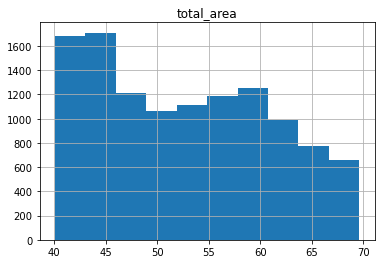

In [111]:
print(data['total_area'].describe())
data.query('total_area.quantile(0.25) < total_area < total_area.quantile(0.75)').hist('total_area')

**Вывод:**
Основной объем квартир приходится на площадь с 40 до 70 квадратных метров. Самые типовые квартиры это 40 - 45 и 60 квадратных метров.

#### Жилая площадь

count   23565.000
mean       35.602
std        21.514
min         2.000
25%        19.000
50%        31.000
75%        46.000
max       409.700
Name: living_area, dtype: float64


array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

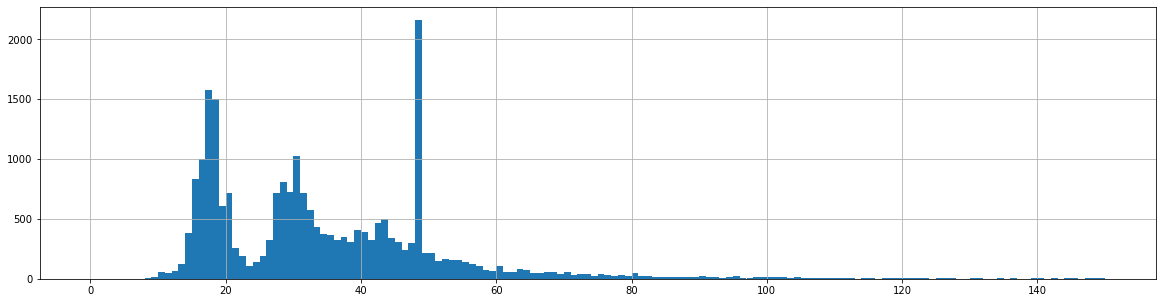

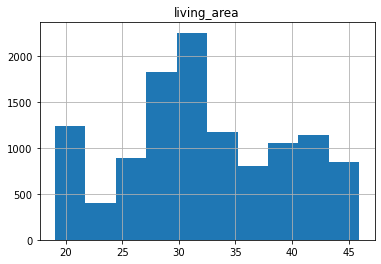

In [112]:
print(data['living_area'].describe())
data['living_area'].hist(bins=150, figsize=(20, 5), range=(0, 150))
data.query('living_area.quantile(0.25) < living_area < living_area.quantile(0.75)').hist('living_area')

**Вывод:**
По жилой площади основные объекты находятся между 19 и 46 метрами. Среди них преобладает медианное значение - 31 квадратный метр. Также, мы видим большие скачки на гистограмме всех данных: около 17 и 47 метров.

#### Площадь кухни

count   21343.000
mean       10.561
std         5.901
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

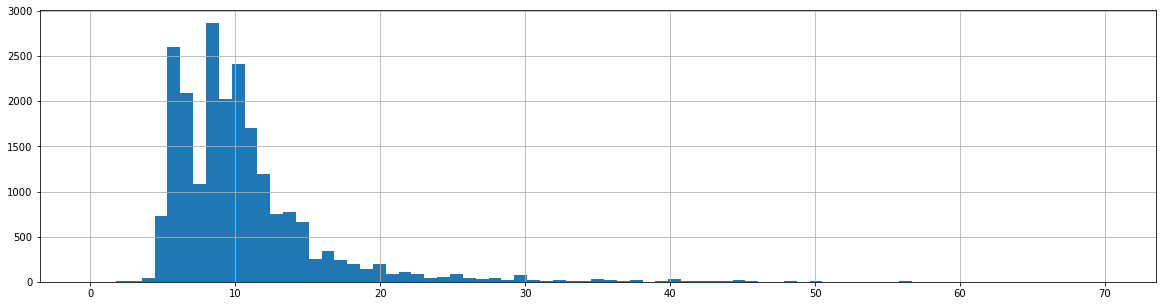

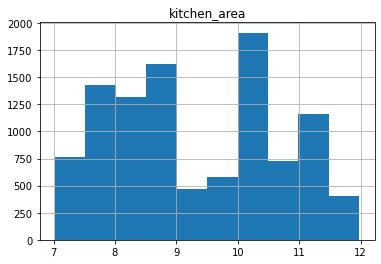

In [113]:
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=79, figsize=(20, 5), range=(0, 70))
data.query('kitchen_area.quantile(0.25) < kitchen_area < kitchen_area.quantile(0.75)').hist('kitchen_area')

**Выводы:**
Самые частые площади кухонь от 7 до 9 квадратных метров. С явным проявлением 9 и 10.5 метров.

#### Цена объекта

count       23565.000
mean      6540058.260
std      10910934.722
min         12190.000
25%       3400000.000
50%       4646000.000
75%       6790000.000
max     763000000.000
Name: last_price, dtype: float64
count     11770.000
mean    4776354.181
std      909492.330
min     3405000.000
25%     4000000.000
50%     4646500.000
75%     5499000.000
max     6780000.000
Name: last_price, dtype: float64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

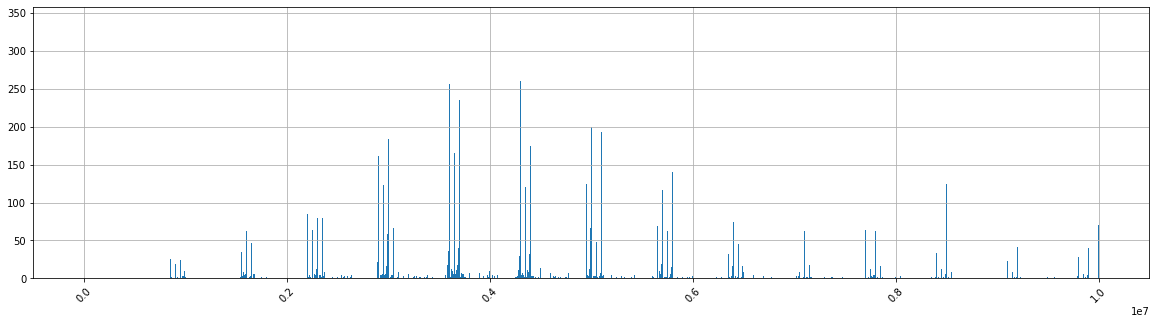

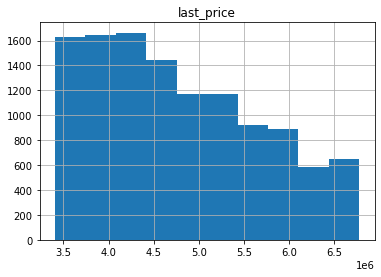

In [114]:
#data['last_price_type'] = pd.cut(data['last_price'], 400)
#print(data.groupby('last_price_type')['last_price'].agg(['count', 'median']))
#data['last_price_type'] = data['last_price_type'].astype('str')
#data['last_price_type'].hist(bins=40, figsize=(20, 5), xrot=45)
print(data['last_price'].describe())
data['last_price'].hist(bins=4000, figsize=(20, 5), xrot=45, range=(0, 10000000))
print(data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)')['last_price'].describe())
data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)').hist('last_price')


**Выводы:**
Основная масса квартир продается с 3.5 до 6.5 миллионов. Интересное распределение всех цен видно на гистограмме всех цен. Можно увидеть, что шаг цен примерно одинаковый.

#### Количество комнат

count   23565.000
mean        2.071
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

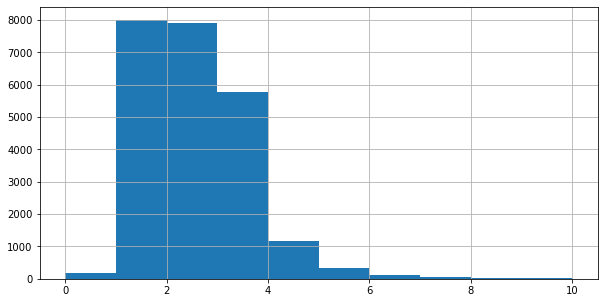

In [115]:
data['rooms'].hist(bins=10, figsize=(10, 5), range=(0, 10))
data['rooms'].describe()

**Выводы:**
Основные квартиры, которые продаются, с 1, 2 или 3 комнатами.

#### Высота потолков

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

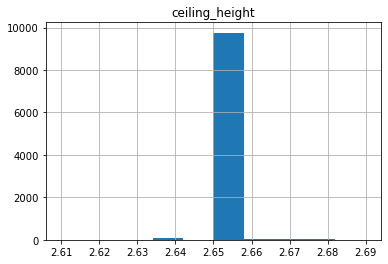

In [116]:
data.query('ceiling_height.quantile(0.25) < ceiling_height < ceiling_height.quantile(0.75)').hist('ceiling_height')

**Выводы:**
Основная масса квартир имеет самую стандартную высоту потолков.

#### Этаж квартиры

count   23565.000
mean        5.878
std         4.871
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

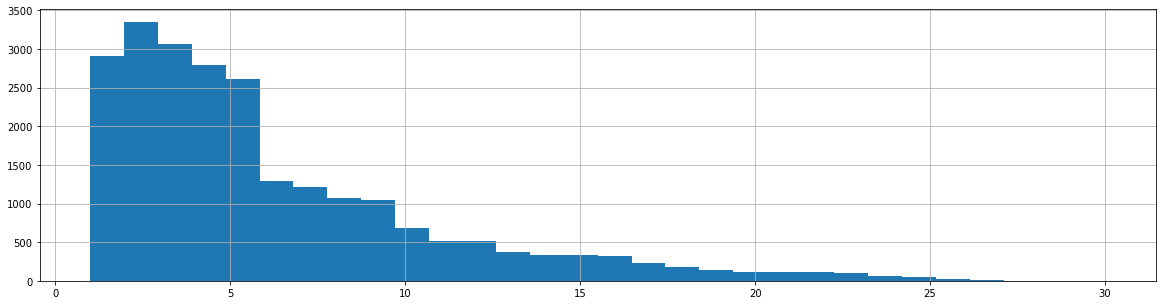

In [117]:
data['floor'].hist(bins=30, figsize=(20, 5), range=(1, 30))
data['floor'].describe()

**Выводы:**
Квартиры с 1 по 5 этаж продаются чаще всего. Квартиры с более высоким этажом продаются сильно реже.

#### Тип этажа квартиры

<AxesSubplot:>

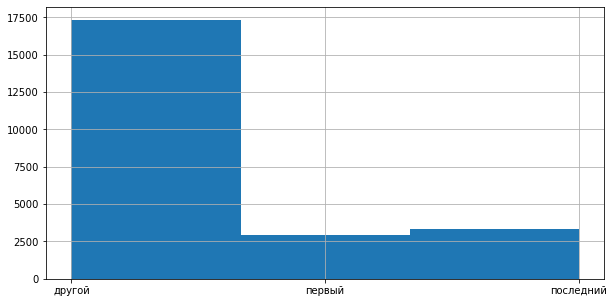

In [118]:
data['floor_type'].hist(bins=3, figsize=(10, 5))

**Выводы:**
Первые и последние этажи продаются примерно в одинаковом соотношении. Каждая категория покрывает собой примерно 10% выборки.

#### Общее количество этажей в доме

count   23565.000
mean       10.676
std         6.595
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

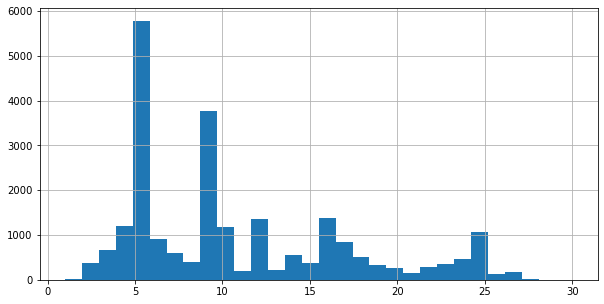

In [119]:
data['floors_total'].hist(bins=30, figsize=(10, 5), range=(1, 30))
data['floors_total'].describe()

**Выводы:**
Самые типовые постройки имеют 5 и 9 этажей.

#### Расстояние до центра города

count   18064.000
mean    14192.656
std      8613.348
min       181.000
25%      9238.000
50%     13096.500
75%     16285.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

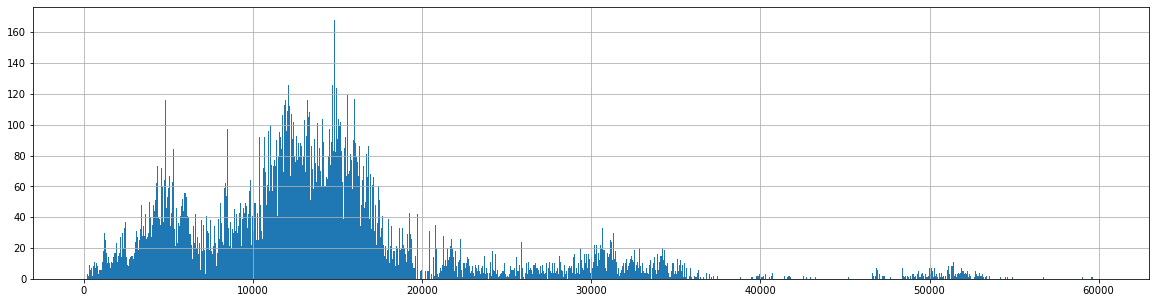

In [120]:
data['cityCenters_nearest'].hist(bins=1000, figsize=(20, 5), range=(0, 60000))
data['cityCenters_nearest'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 9 до 16 километров от центра города. Но можно заметить большой скачек объектов в диапазоне от 4 до 6 километров. 

#### Расстояние до ближайшего аэропорта

count   18041.000
mean    28798.909
std     12630.718
min      6450.000
25%     18573.000
50%     26757.000
75%     37273.000
max     84869.000
Name: airports_nearest, dtype: float64

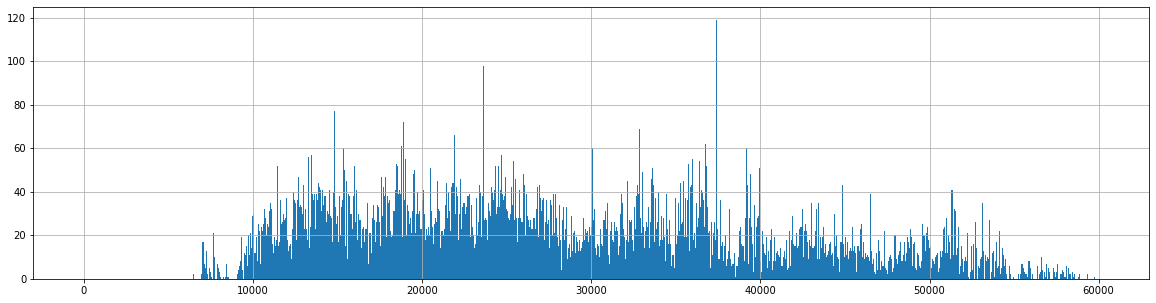

In [121]:
data['airports_nearest'].hist(bins=1000, figsize=(20, 5), range=(0, 60000))
data['airports_nearest'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 18.5 до 37 километров. Ближе 6 и дальше 60 километров объектов, практически, не продается.

#### Расстояние до ближайшего парка

count   8030.000
mean     490.580
std      341.573
min        1.000
25%      288.000
50%      455.000
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64

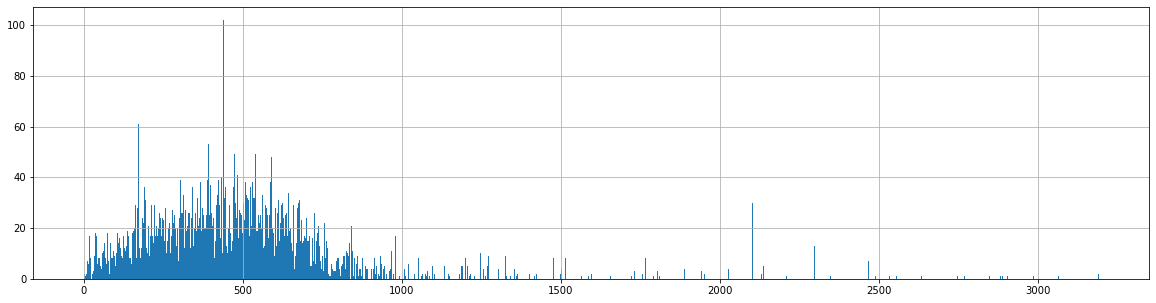

In [122]:
data['parks_nearest'].hist(bins=1500, figsize=(20, 5))
data['parks_nearest'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 1 до 600 метров.

#### День и месяц публикации объявления

<AxesSubplot:>

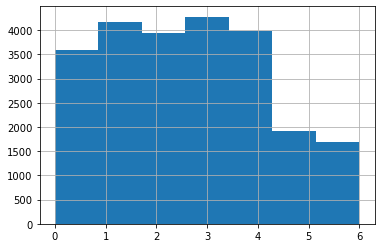

In [123]:
data['weekday'].hist(bins=7)

**Выводы:**
В основном продажей квартир занимаются в будние дни.

<AxesSubplot:>

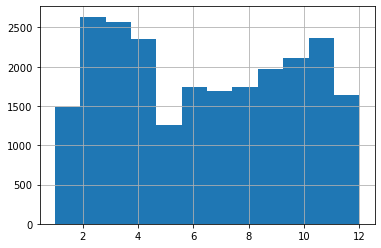

In [124]:
data['month_number'].hist(bins=12)

**Выводы:**
В январе, мае и декабре активность продажи квартир ниже всего. От января до лета происходит падение интереса к продаже квартир. Летом количество продаж на одном уровне, осенью он начинает расти.

#### Как быстро продавались квартиры

count   20394.000
mean      180.741
std       219.733
min         1.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

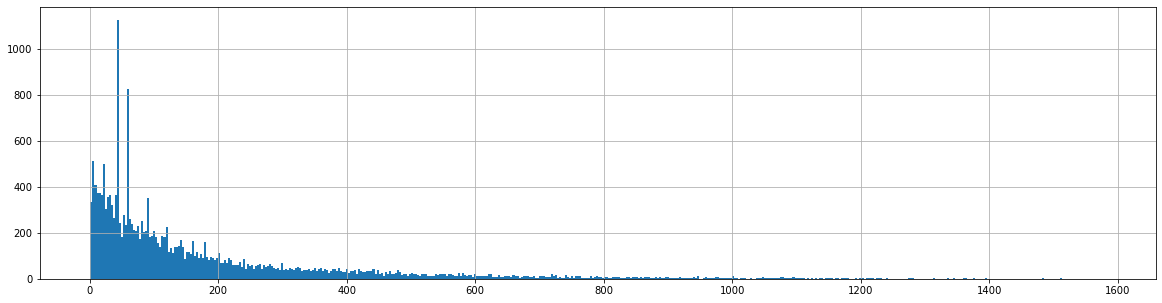

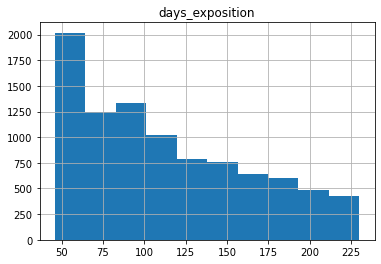

In [125]:
data['days_exposition'].hist(bins=500, figsize=(20, 5))
data.query('days_exposition.quantile(0.25) < days_exposition < days_exposition.quantile(0.75)').hist('days_exposition')
data['days_exposition'].describe()

**Выводы:**
От 45 до 231 дня занимает продажа объекта у основной массы людей.
Более быстрая или медленная продажа является необычным показателем. Возможно, более долгие продажи обусловленны тем, что люди перестают заниматься объявлением и/или отвечать на звонки или сообщения от потенциальных покупателей.

#### Определяем какие факторы больше всего влияют на общую стоимость объекта.

0.49581180347232373

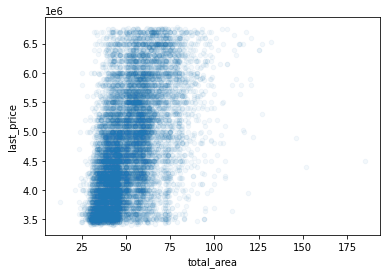

In [126]:
# Влияние общей площади
correct_price_data = data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)')
correct_price_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
correct_price_data['last_price'].corr(correct_price_data['total_area'])


**Выводы:**
Видна несильная, но равномерная зависимость цены от площади объекта. Чем больше площадь, тем большая средняя цена. Корреляция в 0.5 может обуславливаться сторонними факторами, например: состоянием квартиры. Так как маленькая квартира с хорошим ремонтом может стоить на уровне или даже выше чем большая квартира с плохим ремонтом.

0.3565284706869837

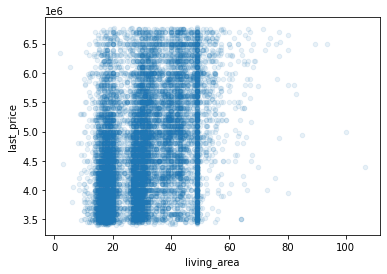

In [127]:
# Влияние жилой площади
correct_price_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
correct_price_data['last_price'].corr(correct_price_data['living_area'])

**Выводы:**
Видны самые частые метражи жилых площадей, но зависимости практически нет.

0.232551588408345

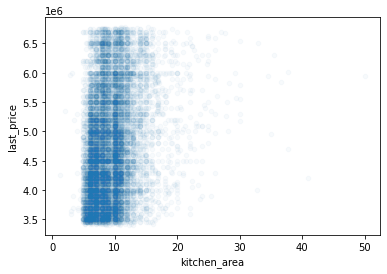

In [128]:
# Влияние площади кухни
correct_price_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
correct_price_data['last_price'].corr(correct_price_data['kitchen_area'])

**Выводы:**
Диаграмма похожа на ту, что отображала зависимость цены от общей площади, но с меньшей корреляцией.

0.32969041364162277

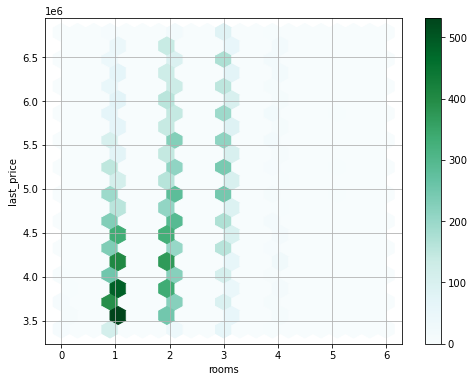

In [129]:
# Влияние количества комнат
correct_price_data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['rooms'])

**Выводы:**
Видна зависимость от количества комнат. Чем меньше комнат тем большая концентрация низкой стоимости объекта и наоборот.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

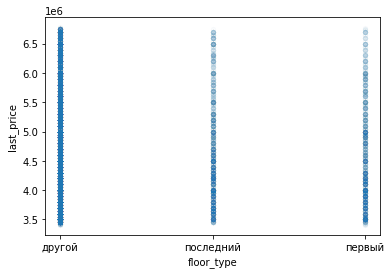

In [130]:
# Влияние типа этажа
correct_price_data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.02)

**Выводы:**
В среднем, цена квартиры на первом этаже ниже чем квартиры на последнем, но и те и другие ниже по цене, чем квартиры на других этажах.

-0.007353541602066855

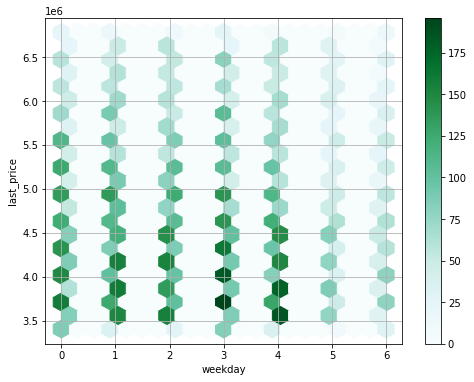

In [131]:
# Влияние дня недели
correct_price_data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['weekday'])

**Выводы:**
Зависимость по дням недели не видна.

-0.011259317320517336

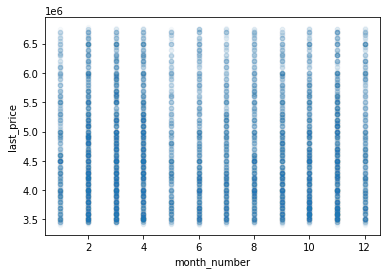

In [132]:
# Влияние месяца
correct_price_data.plot(x='month_number', y='last_price', kind='scatter', alpha=0.03)
correct_price_data['last_price'].corr(correct_price_data['month_number'])

**Выводы:**
Зависимость по месяцам не видна.

0.028015139494966406

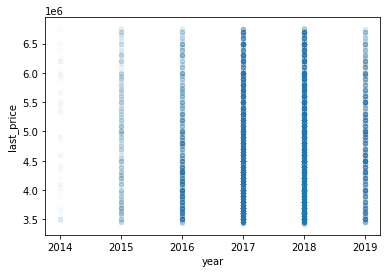

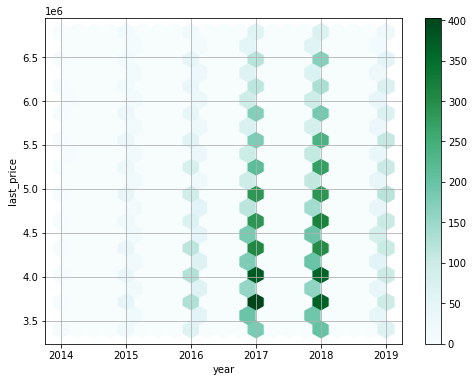

In [133]:
# Влияние года
correct_price_data.plot(x='year', y='last_price', kind='scatter', alpha=0.02)
correct_price_data.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['year'])

**Выводы:**
Зависимость по годам не видна.

#### Определяем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [134]:
popular_locations = data.groupby('clear_locality_name')['avg_area_price'].agg(['count', 'mean'])
popular_locations.columns = ['sales_count', 'avg_area_price']

currect_popular_locations = correct_price_data.groupby('clear_locality_name')['avg_area_price'].agg(['count', 'mean'])
currect_popular_locations.columns = ['sales_count', 'avg_area_price']

popular_locations.sort_values('sales_count', ascending=False).head(10)

,sales_count,avg_area_price
clear_locality_name,,
Санкт-Петербург,15651,114868.434
Мурино,586,86040.659
Кудрово,470,95260.394
Шушары,439,78550.884
Всеволожск,398,68654.008
Пушкин,369,103125.374
Колпино,338,75424.151
Парголово,327,90175.489
Гатчина,307,68745.694


**Выводы:**
Самая высокая цена одного квадратного метра из 10и населенных пунктов с самым большим количеством объявлений в Санкт-Петербурге и равняется 114 тысячам, а самая низкая в Выборге и равняется 58 тысячам.

#### Определяем среднюю цену каждого километра

378450.3945682649
-0.17648528041458855
                        count        mean
cityCenters_nearest_km                   
0.000                       2 5550000.000
1.000                      24 5542499.958
2.000                      43 5671325.581
3.000                      95 5386588.421
4.000                     160 5522595.188
5.000                     207 5616185.449
6.000                     191 5396699.325
7.000                     162 5346918.278
8.000                     235 5079341.472
9.000                     337 4812830.320
10.000                    417 4793597.120
11.000                    773 4818796.499
12.000                   1090 4799916.237
13.000                    988 4874680.994
14.000                    881 4762271.386
15.000                   1023 4774907.223
16.000                    905 4782951.533
17.000                    585 4749712.014
18.000                    172 4620435.262
19.000                    104 4595921.048
20.000                     29 4935827

/var/folders/r2/3pwdwlyj6gd_lhry1fbfyqdr0000gn/T/ipykernel_17358/1371185099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()


<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

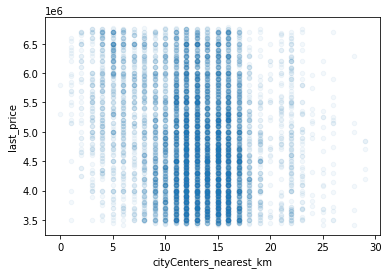

In [135]:
peter_kilometr_price = correct_price_data.query('clear_locality_name == "Санкт-Петербург"')
peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()
print(peter_kilometr_price['last_price'].sum() / peter_kilometr_price['cityCenters_nearest_km'].sum())
print(peter_kilometr_price['last_price'].corr(peter_kilometr_price['cityCenters_nearest_km']))
print(peter_kilometr_price.groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean']))
peter_kilometr_price.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.05)

**Выводы:**
Чем ближе квартира к центру, тем она стоит дороже. 
Количество квартир на среднем расстоянии больше всего в данной выборке. 
За каждый километр стоимость квартиры увеличивается в среднем примерно на 379 тысяч рублей.
Корреляция: -0.18, является незначительной.

### Общий вывод

**Самые частые показатели выборки:**
- Самые типовые квартиры это 40 - 45 и 60 квадратных метров.
- По жилой площади основные объекты находятся между 19 и 46 метрами.
- Самые частые площади кухонь от 7 до 9 квадратных метров. С явным проявлением 9 и 10.5 метров.
- Основная масса квартир продается с 3.5 до 6.5 миллионов. Интересное распределение всех цен видно на гистограмме всех цен. Можно увидеть, что шаг цен примерно одинаковый.
- Основные квартиры, которые продаются, с 1, 2 или 3 комнатами.
- Основная масса квартир имеет самую стандартную высоту потолков (2.65м.).
- Квартиры с 1 по 5 этаж продаются чаще всего. Квартиры с более высоким этажом продаются сильно реже.
- Первые и последние этажи продаются примерно в одинаковом соотношении. Каждая категория покрывает собой примерно 10% выборки.
- Самые типовые постройки имеют 5 и 9 этажей.
- Основная часть объектов продается на расстоянии с 9 до 16 километров от центра города. Но можно заметить большой скачек объектов в диапазоне от 4 до 6 километров. 
- Основная часть объектов продается на расстоянии с 18.5 до 37 километров. Ближе 6 и дальше 60 километров объектов, практически, не продается.
- Основная часть объектов продается на расстоянии с 1 до 600 метров.
- В основном продажей квартир занимаются в будние дни.
- В январе, мае и декабре активность продажи квартир ниже всего. От января до лета происходит падение интереса к продаже квартир. Летом количество продаж на одном уровне, осенью он начинает расти.

**Время продажи объекта:**
- От 45 до 231 дня занимает продажа объекта у основной массы людей.
- Более быстрая или медленная продажа является необычным показателем. Возможно, более долгие продажи обусловленны тем, что люди перестают заниматься объявлением и/или отвечать на звонки или сообщения от потенциальных покупателей.

**Зависимость цены от других факторов:**
- Видна несильная, но равномерная зависимость цены от площади объекта.
- Чем больше площадь, тем большая средняя цена. 
- Корреляция в 0.5 может обуславливаться сторонними факторами, например: состоянием квартиры. Так как маленькая квартира с хорошим ремонтом может стоить на уровне или даже выше чем большая квартира с плохим ремонтом.
- Видны самые частые метражи жилых площадей, но зависимости практически нет.
- Диаграмма похожа на ту, что отображала зависимость цены от общей площади, но с меньшей корреляцией.
- Видна зависимость от количества комнат. Чем меньше комнат тем большая концентрация низкой стоимости объекта и наоборот.
- В среднем, цена квартиры на первом этаже ниже чем квартиры на последнем, но и те и другие ниже по цене, чем квартиры на других этажах.
- Зависимость по дням недели, месяцам и годам не видна.

**Населенные пункты с самым большим количеством объявлений:**
- Самая высокая цена одного квадратного метра из 10и населенных пунктов с самым большим количеством объявлений в Санкт-Петербурге и равняется 114 тысячам, а самая низкая в Выборге и равняется 58 тысячам.

**Зависимость цены от расстояния до центра города:**
- Чем ближе квартира к центру, тем она стоит дороже. 
- Количество квартир на среднем расстоянии больше всего в данной выборке. 
- За каждый километр стоимость квартиры увеличивается в среднем примерно на 379 тысяч рублей.
- Корреляция: -0.18, является незначительной

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод